In [1]:
import tensorflow as ts
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [2]:
(train, test), metadata = tfds.load('horses_or_humans', split=['train[:60%]', 'train[60%:]'],
                                        with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete0NKOQO/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete0NKOQO/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [9]:
def vizualizate(original, augmented):
  fig = plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original')
  plt.imshow(original)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.title('Augmented')
  plt.imshow(augmented)
  plt.axis('off')

In [4]:
get_name = metadata.features['label'].int2str

(-0.5, 299.5, 299.5, -0.5)

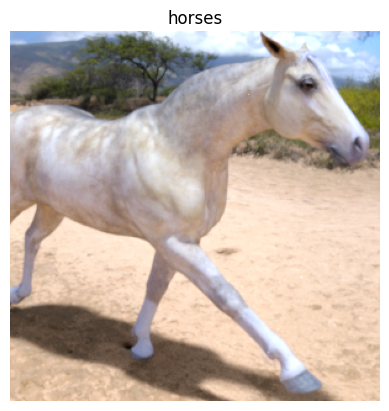

In [5]:
image, label = next(iter(test))
plt.imshow(image)
plt.title(get_name(label))
plt.axis('off')

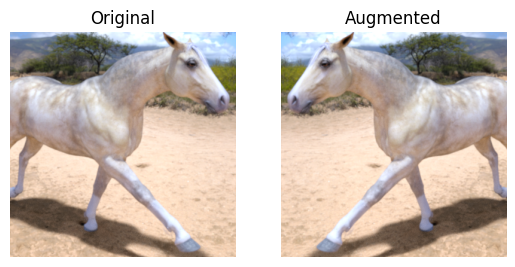

In [10]:
fliped = ts.image.flip_left_right(image)
vizualizate(image, fliped)

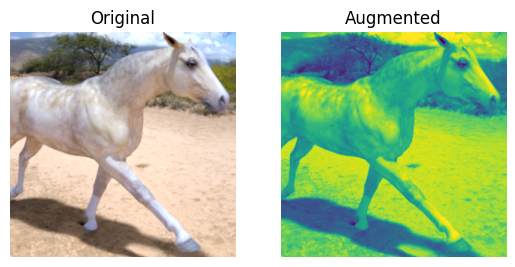

In [11]:
gray_scale = ts.image.rgb_to_grayscale(image)
vizualizate(image, gray_scale)

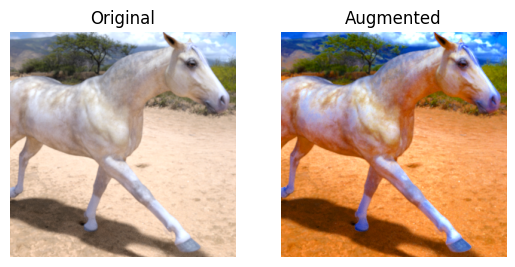

In [13]:
saturated = ts.image.adjust_saturation(image, 3)
vizualizate(image, saturated)

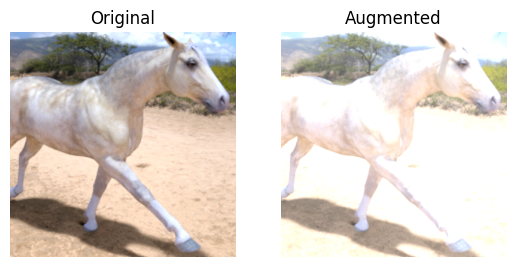

In [14]:
brighted = ts.image.adjust_brightness(image, 0.3)
vizualizate(image, brighted)

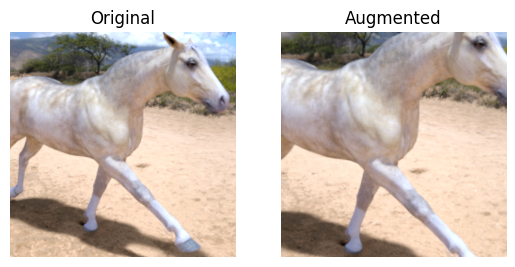

In [20]:
cropped = ts.image.central_crop(image, central_fraction = 0.8)
vizualizate(image, cropped)

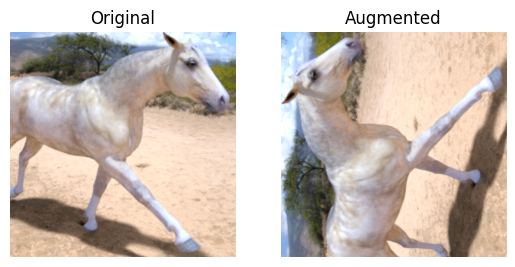

In [21]:
rotated = ts.image.rot90(image)
vizualizate(image, rotated)

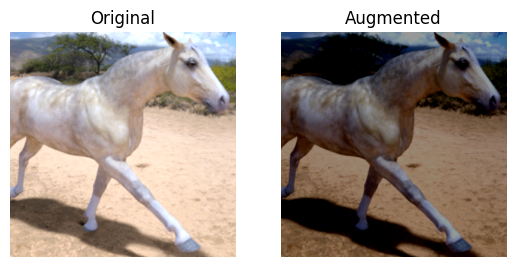

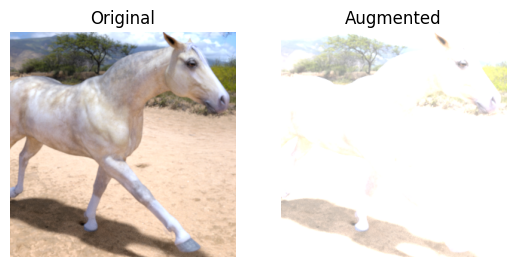

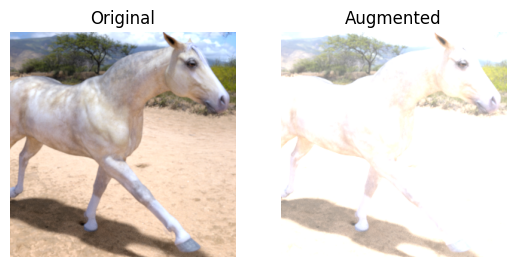

In [23]:
for i in range(3):
  seed = (i, 0)
  random_brightness = ts.image.stateless_random_brightness(image, max_delta=0.7, seed = seed)
  vizualizate(image, random_brightness)